---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32

C:\Users\lolen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2907: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Accuracy of GB classifier on validation set: 0.94
ROC_AUC of GB classifier on cross validation sets:
[0.77511871 0.78955222 0.83228566 0.77806072 0.77184323]


ticket_id
284932    0.049691
285362    0.016381
285361    0.058374
285338    0.049691
285346    0.058374
285345    0.049691
285347    0.053011
285342    0.890402
285530    0.016381
284989    0.020447
285344    0.053011
285343    0.016381
285340    0.016381
285341    0.053011
285349    0.058374
285348    0.049691
284991    0.020447
285532    0.020447
285406    0.020447
285001    0.020447
285006    0.016381
285405    0.016381
285337    0.020447
285496    0.053011
285497    0.049691
285378    0.016381
285589    0.020447
285585    0.049691
285501    0.058374
285581    0.016381
            ...   
376367    0.020447
376366    0.030522
376362    0.181810
376363    0.193519
376365    0.020447
376364    0.030522
376228    0.030522
376265    0.030522
376286    0.254949
376320    0.030522
376314    0.030522
376327    0.254949
376385    0.254949
376435    0.860408
376370    0.891443
376434    0.053011
376459    0.058374
376478    0.010042
376473    0.030522
376484    0.019049
376482    0.020447
37

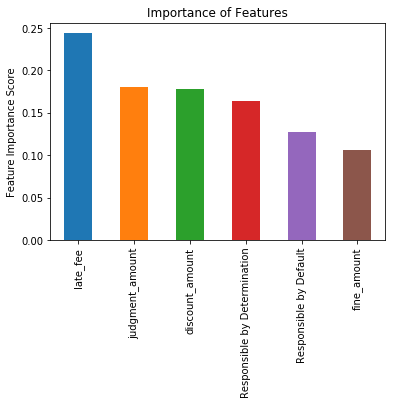

In [66]:
#%cd "C:\Users\lolen\Desktop\Coursera\Applied ML in Python\course3_downloads"

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def blight_model():
    df_train = pd.read_csv('train.csv', encoding='ISO-8859–1')
    df_test = pd.read_csv('test.csv')
    df_add = pd.read_csv('addresses.csv')
    df_latlon = pd.read_csv('latlons.csv')

    df_train = pd.merge(df_train, df_add, how='left', left_on = 'ticket_id', right_on = 'ticket_id')
    df_train = pd.merge(df_train, df_latlon, how='left', left_on = 'address', right_on = 'address')
    df_test = pd.merge(df_test, df_add, how='left', left_on = 'ticket_id', right_on = 'ticket_id')
    df_test = pd.merge(df_test, df_latlon, how='left', left_on = 'address', right_on = 'address')

    #remove NULL compliance
    df_train.dropna(axis='index', subset=['compliance'], inplace=True) #


    #response
    train_y = df_train[['compliance', 'compliance_detail']]
    train_y = train_y['compliance']


    #omitting columns that lead to leakage in feature
    train_x = df_train.drop(['payment_amount', 'payment_date', 'payment_status', 'balance_due', 'collection_status', 
                             'compliance', 'compliance_detail'], axis=1)

    #omitting columns that are not useful based on observation [tentative: 'violation_code', 'violation_description']
    train_x = train_x.drop(['ticket_id', 'inspector_name', 'violator_name', 'violation_street_number', 'violation_zip_code', 
                            'mailing_address_str_number', 'mailing_address_str_name', 'city', 'zip_code', 'non_us_str_code', 
                            'violation_code', 'violation_description', 'clean_up_cost', 'admin_fee', 'state_fee',
                            'address', 'country', 'violation_street_name', 'grafitti_status', 'state', 'lat', 'lon'], axis=1)

    test_x = df_test.drop(['inspector_name', 'violator_name', 'violation_street_number', 'violation_zip_code', 
                           'mailing_address_str_number', 'mailing_address_str_name', 'city', 'zip_code', 'non_us_str_code', 
                           'violation_code', 'violation_description', 'clean_up_cost', 'admin_fee', 'state_fee',
                           'address', 'country', 'violation_street_name', 'grafitti_status', 'state', 'lat', 'lon'], axis=1)
    test_x.set_index('ticket_id',inplace=True)

    #extract month or quarter from 'ticket_issued_date' and 'hearing_date'
    #train_x['issued_month'] = [x.month for x in pd.to_datetime(train_x['ticket_issued_date'])]
    #train_x['hearing_month'] = [x.month for x in pd.to_datetime(train_x['hearing_date'])]
    train_x.drop(['ticket_issued_date', 'hearing_date'], axis=1, inplace=True)

    #test_x['issued_month'] = [x.month for x in pd.to_datetime(test_x['ticket_issued_date'])]
    #test_x['hearing_month'] = [x.month for x in pd.to_datetime(test_x['hearing_date'])]
    test_x.drop(['ticket_issued_date', 'hearing_date'], axis=1, inplace=True)

    #normalizing disposition column for train/test set
    train_x.loc[train_x['disposition']=='Responsible (Fine Waived) by Deter', 'disposition'] = 'Responsible by Determination'

    test_x.loc[test_x['disposition']=='Responsible (Fine Waived) by Admis', 'disposition'] = 'Responsible by Admission'
    test_x.loc[test_x['disposition']=='Responsible (Fine Waived) by Deter', 'disposition'] = 'Responsible by Determination'
    test_x.loc[test_x['disposition']=='Responsible - Compl/Adj by Determi', 'disposition'] = 'Responsible by Determination'
    test_x.loc[test_x['disposition']=='Responsible - Compl/Adj by Default', 'disposition'] = 'Responsible by Default'
    test_x.loc[test_x['disposition']=='Responsible by Dismissal', 'disposition'] = 'Responsible by Determination'

    #converting to categorical using getdummies
    #agency = pd.get_dummies(train_x['agency_name'], drop_first=True)
    dispo = pd.get_dummies(train_x['disposition'], drop_first=True)
    #issued = pd.get_dummies(train_x['issued_month'], drop_first=True)
    #hearing = pd.get_dummies(train_x['hearing_month'], drop_first=True)
    train_x.drop(['agency_name','disposition'],axis=1,inplace=True)
    train_x = pd.concat([train_x,dispo],axis=1)

    #converting to categorical using getdummies
    #agency = pd.get_dummies(test_x['agency_name'], drop_first=True)
    dispo = pd.get_dummies(test_x['disposition'], drop_first=True)
    #issued = pd.get_dummies(test_x['issued_month'], drop_first=True)
    #hearing = pd.get_dummies(test_x['hearing_month'], drop_first=True)
    test_x.drop(['agency_name','disposition'],axis=1,inplace=True)
    test_x = pd.concat([test_x,dispo],axis=1)

    #binarize grafitti_status
    #train_x['grafitti'] = (train_x['grafitti_status']=='GRAFFITI TICKET') * 1
    #only 1 record with GRAFFITI TICKET

    #combining $ inputs
    #train_x['judgment_amount'] = train_x['judgment_amount'] - train_x['discount']
    #discount might be an incentive

    #fill NA
    train_x.fillna(0, inplace=True)
    test_x.fillna(0, inplace=True)

    #insert missing features into test set
    #test_x.insert(6, 'Health Department', 0, allow_duplicates = False)
    #test_x.insert(7, 'Neighborhood City Halls', 0, allow_duplicates = False)

    #split train
    X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, random_state = 0)

    #feature selection
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                       min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=0)
    #selector = RFE(model, 16, step=1)
    selector = model.fit(X_train, y_train)

    #tuning hyperparameters
    #grid_values = {'max_depth': [3, 4, 5, 6], 
    #               'learning_rate':[0.15,0.1,0.05,0.01], 
    #               'n_estimators':[100,250,500,750,1000]}
    #grid_gbt_auc = GridSearchCV(model, param_grid = grid_values,  scoring='roc_auc')
    #grid_gbt_auc.fit(X_train, y_train)

    #print('Accuracy of GB classifier on validation set: {:.2f}'
    #     .format(selector.score(X_val, y_val)))

    #print('ROC_AUC of GB classifier on cross validation sets:')
    #print(cross_val_score(selector, train_x, train_y, cv=5, scoring = 'roc_auc'))

    y_score_lr = selector.predict_proba(test_x).astype(np.float32)
    rslt = pd.Series(y_score_lr[:,1], index=test_x.index)

    #feature importance
    #predictors=list(X_train)
    #feat_imp = pd.Series(selector.feature_importances_, predictors).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Importance of Features')
    #plt.ylabel('Feature Importance Score')
    
    return rslt


#import seaborn as sns
#%matplotlib inline
#dat = pd.concat([train_x, train_y], axis = 1)
#sns.countplot(x='compliance',hue='agency_name',data=df_train)
#selector.support_

blight_model()